# COGS 108 - EDA Checkpoint

# Names

Varsha Sampath\
Elise Davis\
Kody Chuang\
Anna Sim

<a id='research_question'></a>
# Research Question

*Is there a correlation between median income and rate of diabetes diagnosis?*

# Hypothesis

$H_{0}$: There is no correlation between median income and rate of diabetes diagnosis.\
$H_{a}$: Rate of diabetes diagnosis is inversely proportional to median income.

# Dataset(s)

**Dataset #1**
- Dataset Name: US Household Income Statistics
- Link to the dataset: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations 
- Number of observations: 
32,000 records on US Household Income Statistics, including mean income for each city.

**Dataset #2**
- Dataset Name: 500 Cities: Diagnosed Diabetes among adults
- Link to the dataset: https://chronicdata.cdc.gov/500-Cities-Places/500-Cities-Diagnosed-diabetes-among-adults-aged-18/cn78-b9bj/data 
- Number of observations: 29,006
Records for percent of people in each city (of thousands) that have been diagnosed with diabetes.

We plan to cross reference the cities in each data set to combine the mean income data and the diabetes data, to then analyze and uncover any correlation.

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np
# pd.set_option("display.max_columns", 104)

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style

# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

### Dataset #1 Cleaning

Firstly, we sorted the values by area land and dropped the duplicates that occurred in data collection. After that, unnecessary columns were dropped. We ended up with 8128 observations.

In [2]:
inc = pd.read_csv("kaggle_income.csv", na_filter = True, encoding='latin-1')
inc.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [3]:
inc = inc.sort_values(by = 'ALand', ascending = False)\
                        .drop_duplicates(subset=['City'])\
                        .reset_index(drop= True)

In [4]:
inc = inc.drop(columns = ['id', 'State_Code', 'County',
                          'Place', 'Type', 'Primary',
                          'Zip_Code', 'Area_Code', 'ALand',
                          'AWater', 'Lat','Lon', 'sum_w' ])

In [5]:
inc.sort_values('Stdev',ascending = False )

,State_Name,State_ab,City,Mean,Median,Stdev
2303,Florida,FL,Lehigh Acres,122318,127896,102171
503,Texas,TX,Jewett,100110,41907,100239
1456,California,CA,Avery,124426,300000,96241
7054,North Carolina,NC,Carrboro,96387,300000,94721
7553,California,CA,Pacific Palisades,144174,158988,94528
...,...,...,...,...,...,...
3856,California,CA,Anaheim,0,0,0
3887,Missouri,MO,St Charles,0,0,0
8055,Texas,TX,Del Valle,0,0,0
5476,Louisiana,LA,Fort Polk,0,0,0


Additionally, there appeared to be an error in the data for Median Income. The data shows that Median Income for 1053 entries is $300,000. So we cannot use the column Median Income.

In [6]:
inc[inc['Median']==300000]

,State_Name,State_ab,City,Mean,Median,Stdev
16,Wyoming,WY,Cody,72151,300000,36256
38,Maine,ME,Jackman,52315,300000,32439
42,Arizona,AZ,Winslow,74749,300000,44849
47,New Mexico,NM,Tatum,80419,300000,45735
64,Idaho,ID,Leadore,49723,300000,52335
...,...,...,...,...,...,...
8091,West Virginia,WV,Volga,55987,300000,23513
8097,Pennsylvania,PA,Turbotville,54304,300000,31360
8101,New Jersey,NJ,West New York,67035,300000,46989
8105,Vermont,VT,East Montpelier,54118,300000,33422


In [7]:
inc = inc.drop(columns = 'Median')

In [8]:
inc

,State_Name,State_ab,City,Mean,Stdev
0,Alaska,AK,Kiana,58546,45306
1,Alaska,AK,Huslia,40950,34933
2,Alaska,AK,Takotna,53751,45019
3,Alaska,AK,Copper Center,50328,44831
4,Alaska,AK,Egegik,62733,52096
...,...,...,...,...,...
8123,Michigan,MI,Pentwater,0,0
8124,Florida,FL,Cedar Key,0,0
8125,Florida,FL,Ocoee,0,0
8126,Maryland,MD,Ridge,0,0


###  Dataset #2 Cleaning

In the current dataset, the entries were made gradually until the whole population of the city was covered. We have dropped the intermediate entries and kept the remaining 475 cities. The columns with unnecessary information were dropped, the index was reset, and the values were sorted.

In [9]:
db = pd.read_csv("Diagnosed_Diabetes.csv", na_filter = True, thousands=',', decimal='.')
db.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Inglewood,Census Tract,BRFSS,Health Outcomes,0636546-06037601801,Diagnosed diabetes among adults aged >=18 Years,%,...,13.5,NaN,NaN,2472,"(33.9439711273, -118.349937728)",HLTHOUT,DIABETES,636546.0,6.037602e+09,Diabetes
1,2017,AL,Alabama,Huntsville,Census Tract,BRFSS,Health Outcomes,0137000-01089002922,Diagnosed diabetes among adults aged >=18 Years,%,...,10.3,NaN,NaN,4387,"(34.612755588, -86.5329568642)",HLTHOUT,DIABETES,137000.0,1.089003e+09,Diabetes
2,2017,AK,Alaska,Anchorage,Census Tract,BRFSS,Health Outcomes,0203000-02020002501,Diagnosed diabetes among adults aged >=18 Years,%,...,7.8,NaN,NaN,4993,"(61.1593945029, -149.899866691)",HLTHOUT,DIABETES,203000.0,2.020003e+09,Diabetes
3,2017,AZ,Arizona,Tempe,Census Tract,BRFSS,Health Outcomes,0473000-04013319907,Diagnosed diabetes among adults aged >=18 Years,%,...,7.9,NaN,NaN,2225,"(33.3419171912, -111.919809152)",HLTHOUT,DIABETES,473000.0,4.013320e+09,Diabetes
4,2017,AZ,Arizona,Yuma,City,BRFSS,Health Outcomes,0485540,Diagnosed diabetes among adults aged >=18 Years,%,...,11.3,NaN,NaN,93064,"(32.5986027117, -114.54836837)",HLTHOUT,DIABETES,485540.0,NaN,Diabetes


In [10]:
db = db.drop(columns=['Year', 'DataSource', 'Measure',
                      'CategoryID', 'Category', 'MeasureId',
                      'Short_Question_Text', 'TractFIPS','GeographicLevel',
                      'UniqueID', 'GeoLocation', 'CityFIPS',
                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
                      'Low_Confidence_Limit', 'High_Confidence_Limit', 'DataValueTypeID'])

In [11]:
db = db[['StateAbbr',
         'StateDesc',
         'CityName',
         'Data_Value_Type',
         'Data_Value_Unit',
         'Data_Value',
         'PopulationCount']]

In [12]:
db = db.sort_values(by = 'PopulationCount', ascending = False)\
                    .drop_duplicates(subset=['CityName'], keep='first')\
                    .reset_index(drop= True)

In [13]:
db

,StateAbbr,StateDesc,CityName,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount
0,US,United States,NaN,Crude prevalence,%,10.8,308745538
1,NY,New York,New York,Crude prevalence,%,10.9,8175133
2,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621
3,IL,Illinois,Chicago,Age-adjusted prevalence,%,12.2,2695598
4,TX,Texas,Houston,Age-adjusted prevalence,%,13.3,2099451
...,...,...,...,...,...,...,...
470,GA,Georgia,Warner Robins,Age-adjusted prevalence,%,12.0,66588
471,SC,South Carolin,Rock Hill,Age-adjusted prevalence,%,12.4,66154
472,NY,New York,Schenectady,Crude prevalence,%,10.5,66135
473,WY,Wyoming,Cheyenne,Age-adjusted prevalence,%,8.2,59466


### Merging of two data frames

Lastly, two data sets were merged together. Repeated columns were dropped.\
As a result we got 278 cities in our analysis.

In [14]:
df = pd.merge(db, inc, how='inner', left_on=['CityName', 'StateDesc'], right_on=['City', 'State_Name'])

In [15]:
df

,StateAbbr,StateDesc,CityName,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,State_Name,State_ab,City,Mean,Stdev
0,NY,New York,New York,Crude prevalence,%,10.9,8175133,New York,NY,New York,0,0
1,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621,California,CA,Los Angeles,189728,84217
2,IL,Illinois,Chicago,Age-adjusted prevalence,%,12.2,2695598,Illinois,IL,Chicago,67450,62043
3,AZ,Arizona,Phoenix,Crude prevalence,%,9.5,1445632,Arizona,AZ,Phoenix,68506,56207
4,TX,Texas,San Antonio,Age-adjusted prevalence,%,13.7,1327407,Texas,TX,San Antonio,89970,65863
...,...,...,...,...,...,...,...,...,...,...,...,...
273,MT,Montana,Missoula,Crude prevalence,%,6.0,66788,Montana,MT,Missoula,78840,61392
274,CA,California,Redondo Beach,Age-adjusted prevalence,%,6.3,66748,California,CA,Redondo Beach,109016,58288
275,LA,Louisiana,Kenner,Age-adjusted prevalence,%,11.9,66702,Louisiana,LA,Kenner,90715,62857
276,GA,Georgia,Warner Robins,Age-adjusted prevalence,%,12.0,66588,Georgia,GA,Warner Robins,50358,9547


In [16]:
df = df.drop(columns=['StateAbbr', 'StateDesc', 'CityName'])

In [17]:
df = df [[
    'State_ab',
    'State_Name',
    'City',
    'Data_Value_Type',
    'Data_Value_Unit',
    'Data_Value',
    'PopulationCount',
    'Mean',
    'Stdev']]

### Final Touches

We discovered some income-statistic values were missing, so we dropped them too.

In [18]:
df.sort_values(by = 'Mean', ascending = False)

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
1,CA,California,Los Angeles,Crude prevalence,%,10.0,3792621,189728,84217
33,CA,California,Santa Ana,Age-adjusted prevalence,%,13.8,324528,172734,78612
130,CA,California,Costa Mesa,Age-adjusted prevalence,%,9.0,109960,168957,79604
220,TX,Texas,Sugar Land,Age-adjusted prevalence,%,9.3,78817,159750,69908
118,FL,Florida,Coral Springs,Age-adjusted prevalence,%,8.6,121096,150858,80583
...,...,...,...,...,...,...,...,...,...
166,TX,Texas,College Station,Crude prevalence,%,4.8,93857,20684,21892
55,TX,Texas,Irving,Crude prevalence,%,9.8,216290,0,0
74,TN,Tennessee,Knoxville,Age-adjusted prevalence,%,11.6,178874,0,0
31,CA,California,Anaheim,Crude prevalence,%,9.9,336265,0,0


In [19]:
df = df.drop(index = [0, 31, 74, 55], axis=0)

In [20]:
df = df.sort_values(by = 'State_ab').reset_index(drop= True)

### Results:

Now the resulting data frame contains 274 cities.

In [21]:
df

,State_ab,State_Name,City,Data_Value_Type,Data_Value_Unit,Data_Value,PopulationCount,Mean,Stdev
0,AK,Alaska,Anchorage,Crude prevalence,%,7.3,291826,77110,54957
1,AL,Alabama,Birmingham,Age-adjusted prevalence,%,16.2,212237,50662,43229
2,AL,Alabama,Hoover,Age-adjusted prevalence,%,8.1,81619,118301,67248
3,AL,Alabama,Mobile,Age-adjusted prevalence,%,13.5,195111,53330,50855
4,AL,Alabama,Tuscaloosa,Crude prevalence,%,10.2,90468,55815,54867
...,...,...,...,...,...,...,...,...,...
269,WA,Washington,Yakima,Crude prevalence,%,11.8,91067,89816,48414
270,WI,Wisconsin,Milwaukee,Age-adjusted prevalence,%,11.3,594833,78720,47064
271,WI,Wisconsin,Kenosha,Crude prevalence,%,8.4,99218,61404,35324
272,WI,Wisconsin,Waukesha,Crude prevalence,%,7.1,70718,98823,56923


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

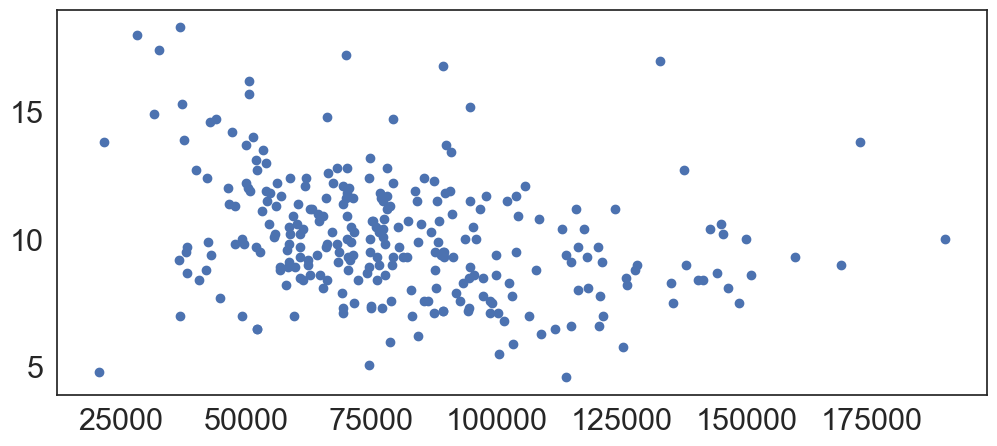

In [22]:
#This is just an initial out of the box plot.
#There is some negative correlation there which is good
#Now, we need to work with the data to make it more obvious and salient 
plt.scatter(df['Mean'].values, df['Data_Value'].values)

Quanitifying a relationship between the two variables using Pearson's correlation coefficient is only one part of understanding the complete relationship between median income and adults with diabetes in American cities.
To further our deep dive into this relationship, we must draw conclusions about populations and not just samples so we must conduct a statistical significance test.

## Significance Testing

A significance test teslls us whether or not what we observe in the sample is expected to be true across all of the population. This can be done through a hypothesis test.

Here we are importaing all of the packages that we will use to run the significance tests in this section

In [23]:
#import scipy.stats to access the t-test function that allows us to
#conduct our hypothesis testing
import scipy.stats as stats
from scipy.stats import ttest_ind

### Hypothesis Test

A hypothesis test helps us infer whether the value of the population correlation coefficient $\rho$ is close to or very different from 0. This inference is decided based on the sample correlation coefficient r and the sample size n.

$H_{0}$ ($\rho$ = 0): There is no correlation between median income and rate of diabetes diagnosis.\
$H_{a}$ ($\rho$ != 0): Rate of diabetes diagnosis is inversely proportional to median income.

### T-test

A T-test is an inferential statistic that allows us to use sample data to generalize an assumption to an entire population. This will help us find out if the sample correlation between median income and adults with diabetes is repeatable for the entire population

In [24]:
#Runs a t-test using stats.ttest_ind from scipy.stats
#saves the t-value to t_val and saves the p-value to p_val
[t_val, p_val] = stats.ttest_ind(df['Data_Value'], df['Mean'])

#### T-value

From the t-test above we get the t-value to be:

In [25]:
t_val

-45.86171162001155

In t-tests, the bigger the t-value, the more likely that the correlation is repeatable. The "bigness" of the t-value is subjective so we must calculate the p-value to tell us how big is "big enough"

#### P-value

Every t-test has one t-value and one p-value. A p-value is the probability that the null hypothesis is true, which is the probability that there is no correlation between median household income and adults with diabetes in American cities.

E.g. A p-value of 0.05 means there is a 5% chance results from the dataset occurred to chance and there is no correlation.

From the t-test above we get the t-value to be:

In [26]:
p_val

2.0989268080389036e-189

#### Decision

To decide whether we reject the null hypothesis in favor of the alternative, we must use the previouse t-values and p-values to see if our correlation is statistically significant.

In most research the threshold for significance is which there is a p-value of 0.05 or below. Significance levels like these are refered to as $\alpha$. For our data, we want to be extra sure that our data did not occur just by chance, so we will have our significance level be an $\alpha$ value of 0.01 This indicates that a our data would be statistically significant if 
($\alpha$ = 0.01) and (p-value < $\alpha$)

We can check that here:

In [27]:
#Check whether our p-value from above is less than the significance level(alpha) of 0.01
alpha = 0.01
stat_sig = (p_val < alpha)
stat_sig

True

As we can see, our p-value of 2.09e-189 is way below our significance level of $\alpha$ = 0.01 meaning that our data is statistically significant and there is a real correlation between median household income and adults with diabetes in American cities. 

From this, we can now comfortably reject the null hypothesis in favor of the alternative:

~~$H_{0}$: There is no correlation between median income and rate of diabetes diagnosis. ~~ 

__$H_{a}$: Rate of diabetes diagnosis is inversely proportional to median income.__